In [1]:
import numpy as ny
import pandas as pd 
import seaborn as sns

file_path = "datasets/antropometria-dataset.csv"

df = pd.read_csv(file_path)
df.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


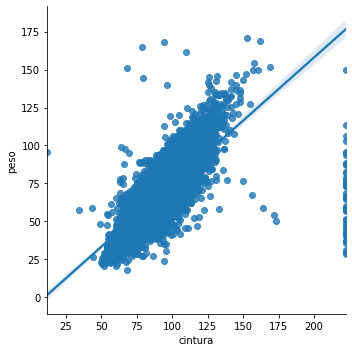

In [2]:

sns.lmplot(x= "cintura",
          y ="peso",
          data = df,
          fit_reg = True)


Text(0.5, 1.0, 'regresión lineal')

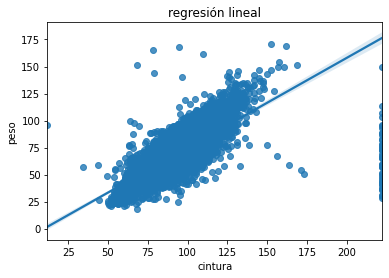

In [3]:
reg_plot= sns.regplot (x = "cintura",
                      y = "peso",
                      data = df)
reg_plot.set_title("regresión lineal")


In [7]:
x = df ["cintura"].values
y = df ["peso"].values

In [8]:
x

array([ 98.7 ,  64.  ,  67.6 , ...,  71.35,  99.95, 108.15])

In [9]:
c = df[["cintura","peso"]].corr()
c

,cintura,peso
cintura,1.000000,0.791677
peso,0.791677,1.000000


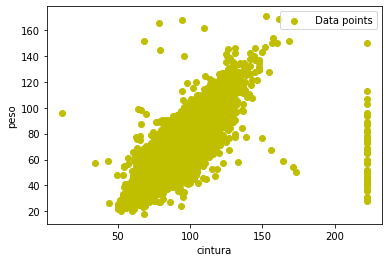

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.scatter(x =x, y=y,         
           c="Y",
           label = " Data points")
plt.xlabel("cintura")
plt.ylabel("peso")

plt.legend()
plt.show()

In [12]:
import statsmodels.api as sm

model = sm.OLS.from_formula("y~x",
                           data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 3.028e+04
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:37:49   Log-Likelihood:                -68622.
No. Observations:               18032   AIC:                         1.372e+05
Df Residuals:                   18030   BIC:                         1.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3137      0.427    -19.458      0.000      -9.151      -7.476
x              0.8316      0.005    173.999      0.000       0.822       0.841
==============================================================================
Omnibus:                    12737.948   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1022852.813
Skew:                          -2.683   Prob(JB):                         0.00
Kurtosis:                      39.505   Cond. No.                         472.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

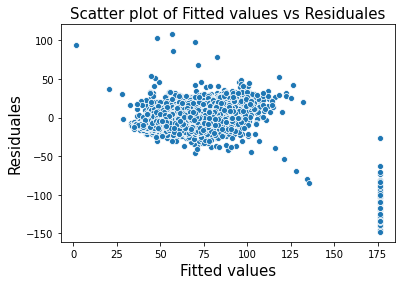

In [13]:
pp = sns.scatterplot( x = result.fittedvalues, 
                    y = result.resid)
pp.set_xlabel("Fitted values",
             size = 15)
pp.set_ylabel("Residuales",
             size = 15)
pp.set_title("Scatter plot of Fitted values vs Residuales",
            size = 15)
plt.show()

In [14]:
result.resid

0        -0.062068
1        -9.256672
2         6.899685
3        -8.679342
4        12.296515
           ...    
18635     6.777867
18636    -7.979387
18637    -4.268694
18638   -15.751528
18639    -1.620382
Length: 18032, dtype: float64

In [15]:
df_analysis = df.loc[:,["sexo","cintura","peso"]]
df_analysis

,sexo,cintura,peso
0,2,98.70,73.70
1,2,64.00,35.65
2,2,67.60,54.80
3,1,60.60,33.40
4,2,113.00,97.95
...,...,...,...
18635,2,93.00,75.80
18636,2,103.05,69.40
18637,1,71.35,46.75
18638,2,99.95,59.05


In [16]:
df_analysis.set_index("sexo",
                     inplace = True)

In [20]:
df_analysis.head()

,cintura,peso
sexo,,
2,98.7,73.70
2,64.0,35.65
2,67.6,54.80
1,60.6,33.40
2,113.0,97.95


In [29]:
df_sex=df_analysis.loc[2]

In [30]:
df_sex

,cintura,peso
sexo,,
2,98.70,73.70
2,64.00,35.65
2,67.60,54.80
2,113.00,97.95
2,57.30,31.95
...,...,...
2,94.10,75.40
2,93.00,75.80
2,103.05,69.40


In [ ]:
#Al terminar de analizar esta base de datos, logre percatarme que nuestra R^2 es muy baja entonces se puede decir
# que el analisis no es tan preciso. Por otro lado, se puede observar por la tabla de sexo, que el sexo con más
#peso y cintura mayor es el 2 el de los hombres.